In [1]:
# 模型训练-验证

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [3]:
train_path = r'E:\DataSet\Tianchi\zhengqi\zhengqi_train.txt'
test_path = r'E:\DataSet\Tianchi\zhengqi\zhengqi_test.txt'

train_data = pd.read_csv(train_path, delimiter="\t", encoding='utf-8')
test_data = pd.read_csv(test_path, delimiter="\t", encoding='utf-8')

In [4]:
# 数据归一化处理

from sklearn.preprocessing import MinMaxScaler
feature_columns = [col for col in train_data.columns if col not in  ['target']]
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_data[feature_columns])
train_data_scaler = min_max_scaler.transform(train_data[feature_columns])
test_data_scaler = min_max_scaler.transform(test_data[feature_columns])
train_data_scaler = pd.DataFrame(train_data_scaler)
test_data_scaler= pd.DataFrame(test_data_scaler)
train_data_scaler.columns = feature_columns
train_data_scaler['target'] = train_data['target']
test_data_scaler.columns = feature_columns
# display(train_data_scaler.describe())

In [5]:
# pca 降维，保留16个特征
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:, :-1])
new_test_pca_16 = pca.fit_transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']


In [6]:
# 将数据进行切分
from sklearn.model_selection import train_test_split

new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# train_test_split?
train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0 )

In [7]:
# 欠拟合
clf = SGDRegressor(max_iter=500, tol=1e-2)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('SGDRegressor train score: ', score_train)
print('SGDRegressor test score: ', score_test)

SGDRegressor train score:  0.15129535849638248
SGDRegressor test score:  0.15567368184342317


In [8]:
# 过拟合
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures?
poly = PolynomialFeatures(degree=5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('PolynomialFeatures 5 train score: ', score_train)
print('PolynomialFeatures 5  test score: ', score_test)

PolynomialFeatures 5 train score:  0.1323511195861354
PolynomialFeatures 5  test score:  0.14488185896055733


In [9]:
# 正常拟合
poly = PolynomialFeatures(degree=3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('PolynomialFeatures 5 train score: ', score_train)
print('PolynomialFeatures 5  test score: ', score_test)

PolynomialFeatures 5 train score:  0.13421040251166763
PolynomialFeatures 5  test score:  0.1426441506857135


In [10]:
# 模型正则化
# L2范数
poly = PolynomialFeatures(degree=3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='L2')
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('L2 train score: ', score_train)
print('L2 test score: ', score_test)

L2 train score:  0.13414476039934456
L2 test score:  0.14255656880943482


In [11]:
# L1范数
poly = PolynomialFeatures(degree=3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='L1')
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('L1 train score: ', score_train)
print('L1 test score: ', score_test)

L1 train score:  0.13621799518635574
L1 test score:  0.1437521114646063


In [12]:
# 弹性网络
poly = PolynomialFeatures(degree=3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.fit_transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty='elasticnet')
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print('elasticnet train score: ', score_train)
print('elasticnet test score: ', score_test)

elasticnet train score:  0.13408357530908155
elasticnet test score:  0.14245510647754397


In [13]:
# 交叉验证
# 简单交叉验证
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('SGDRegressor train score: ', score_train)
print('SGDRegressor test score: ', score_test)

SGDRegressor train score:  0.14150006947000587
SGDRegressor test score:  0.14707076312639478


In [14]:
# K折交叉验证
from sklearn.model_selection import KFold
# ValueError: Found input variables with inconsistent numbers of samples: [2311, 2310]

# kf = KFold(n_splits=5)
# for k, (train_index, test_index) in enumerate(kf.split(train)):
#     if (k == 3):
#         print(train.shape)
#         print(train_index)
#         print(test_index)
#     train_data, test_data, train_taret, test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
#     clf = SGDRegressor(max_iter=1000, tol=1e-3)
#     clf.fit(train_data, train_target)
#     score_train = mean_squared_error(train_target, clf.predict(train_data))
#     score_test = mean_squared_error(test_target, clf.predict(test_data))
#     print(k, '折', 'SGDRegressor train score: ', score_train)
#     print(k, '折', 'SGDRegressor test score: ', score_test)

In [15]:
# 留一法验证
from sklearn.model_selection import LeaveOneOut
# loo = LeaveOneOut()
# # kf = KFold(n_splits=5)
# for k, (train_index, test_index) in enumerate(loo.split(train)):
#     train_data, test_data, train_taret, test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
#     clf = SGDRegressor(max_iter=1000, tol=1e-3)
#     clf.fit(train_data, train_target)
#     score_train = mean_squared_error(train_target, clf.predict(train_data))
#     score_test = mean_squared_error(test_target, clf.predict(test_data))
#     print(k, '折', 'SGDRegressor train score: ', score_train)
#     print(k, '折', 'SGDRegressor test score: ', score_test)
#     if k > 9:
#         break

In [16]:
# 调参 穷举网格搜索
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)
randomFrestRegression = RandomForestRegressor()
parameters = {'n_estimators': [50, 100, 200], 'max_depth': [1, 2, 3]}
clf = GridSearchCV(randomFrestRegression, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('RandomForestRegressor GridSearchCV test score', score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test score 0.2550962469846012


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [17]:
# 调参 随机搜索
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)
randomFrestRegression = RandomForestRegressor()
parameters = {'n_estimators': [50, 100, 200, 300], 'max_depth': [1, 2, 3, 4, 5]}
clf = RandomizedSearchCV(randomFrestRegression, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('RandomizedSearchCV GridSearchCV test score', score_test)
# sorted(clf.cv_results_.keys())
# print(clf.best_params_)
# {'n_estimators': 50, 'max_depth': 5}

RandomizedSearchCV GridSearchCV test score 0.19612839907115806


In [18]:
# 调参 随机搜索
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import lightgbm as lgb

train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)
clf = lgb.LGBMRegressor(num_leaves=31)
# clf?
parameters = {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [20, 40]}
clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print('LGBMRegressor GridSearchCV test score', score_test)
print('LGBMRegressor best parameters: ', clf.best_params_)

LGBMRegressor GridSearchCV test score 0.15078191689842177
LGBMRegressor best parameters:  {'learning_rate': 0.1, 'n_estimators': 40}


In [19]:
# LGB线下验证
train_path = r'E:\DataSet\Tianchi\zhengqi\zhengqi_train.txt'
test_path = r'E:\DataSet\Tianchi\zhengqi\zhengqi_test.txt'

train_data2 = pd.read_csv(train_path, delimiter="\t", encoding='utf-8')
test_data2 = pd.read_csv(test_path, delimiter="\t", encoding='utf-8')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

# LGB模型
import lightgbm as lgb
from sklearn.model_selection import KFold
import numpy as np

Folds = 5
kf = KFold(n_splits=Folds, shuffle=True, random_state=2019)
MSE_DICT = {'train_mse': [], 'test_mse': []}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    lgb_reg = lgb.LGBMRegressor(learning_rate=0.01,
                               max_depth = -1,
                               n_estimators=5000,
                               boosting_type='gbdt',
                               random_state=2019,
                               objective='regression')
    X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[test_index]
    y_train_KFold, y_test_KFold = train_data2_target[train_index], train_data2_target[test_index]
    lgb_reg.fit(X=X_train_KFold,
                y=y_train_KFold,
                eval_set=[(X_train_KFold, y_train_KFold),
                          (X_test_KFold, y_test_KFold)],
               eval_names=['Train', 'Test'],
               early_stopping_rounds=100,
               eval_metric='MSE',
               verbose=50)
    # 训练集和测试集预测
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold, num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold, num_iteration=lgb_reg.best_iteration_)
    
    print('第{}折 训练和预测训练MSE 预测MSE'.format(i + 1))
    train_mse = mean_squared_error(y_train_KFold, y_train_KFold_predict)
    print('-----\n', '训练MSE\n', train_mse, '\n----')
    test_mse = mean_squared_error(y_test_KFold, y_test_KFold_predict)
    print('-----\n', '预测MSE\n', test_mse, '\n----')
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
    

print('-----\n', '训练MSE\n', MSE_DICT['train_mse'], '\n',
      np.mean(MSE_DICT['train_mse']),'\n----')
print('-----\n', '预测MSE\n', MSE_DICT['test_mse'], '\n',
      np.mean(MSE_DICT['test_mse']),'\n----')
    
    

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.428458	Test's l2: 0.466965
[100]	Train's l2: 0.221807	Test's l2: 0.263431
[150]	Train's l2: 0.135301	Test's l2: 0.183515
[200]	Train's l2: 0.0958737	Test's l2: 0.148825
[250]	Train's l2: 0.075642	Test's l2: 0.133187
[300]	Train's l2: 0.0629311	Test's l2: 0.125237
[350]	Train's l2: 0.054088	Test's l2: 0.121321
[400]	Train's l2: 0.0473551	Test's l2: 0.118307
[450]	Train's l2: 0.0418952	Test's l2: 0.116414
[500]	Train's l2: 0.0375119	Test's l2: 0.114863
[550]	Train's l2: 0.0337062	Test's l2: 0.114002
[600]	Train's l2: 0.0303868	Test's l2: 0.112781
[650]	Train's l2: 0.02756	Test's l2: 0.11207
[700]	Train's l2: 0.0250506	Test's l2: 0.111287
[750]	Train's l2: 0.0228758	Test's l2: 0.110742
[800]	Train's l2: 0.0209081	Test's l2: 0.1103
[850]	Train's l2: 0.0191684	Test's l2: 0.109946
[900]	Train's l2: 0.0176066	Test's l2: 0.109759
[950]	Train's l2: 0.0162243	Test's l2: 0.109423
[1000]	Train's l2: 0.014984	Test's l2

# 学习曲线

<module 'matplotlib.pyplot' from 'D:\\DevTools\\Ana3\\envs\\tf\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 2700x1500 with 0 Axes>

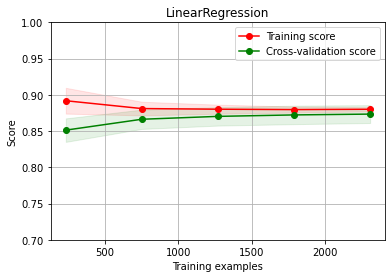

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

plt.figure(figsize=(18, 10), dpi=150)

def plot_learning_curve(estimator, title, X, y,
                        ylim=None, cv=None, n_jobs=1,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
#     learning_curve?
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator,
                                                           X=X, y=y, cv=cv, n_jobs=n_jobs,
                                                           train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color='r')
    
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color='g')
    
    plt.plot(train_sizes,
             train_scores_mean,
             'o-',
             color='r',
             label='Training score')
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    return plt

X = train_data2[test_data2.columns].values
y = train_data2['target'].values
title = 'LinearRegression'
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SGDRegressor()
plot_learning_curve(estimator=estimator,
                    title=title,
                    X=X,
                    y=y,
                    ylim=(0.7, 1.0),
                    cv=cv,
                    n_jobs=-1)

    

<module 'matplotlib.pyplot' from 'D:\\DevTools\\Ana3\\envs\\tf\\lib\\site-packages\\matplotlib\\pyplot.py'>

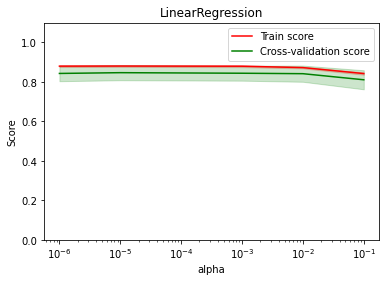

In [21]:
# 验证曲线
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, X, y, ylim=None,
                         cv=None, n_jobs=1):
    plt.figure()
    plt.title(title)
    plt.xlabel('alpha')
    plt.ylabel('Score')
    if ylim is not None:
        plt.ylim(*ylim)
    
#     validation_curve?
    param_range = [0.1, 0.01, 0.001, 0.00001, 0.000001]
    train_scores, test_scores = validation_curve(estimator=estimator,
                                                              X=X, y=y, 
                                                              param_name='alpha',
                                                              param_range=param_range,
                                                              cv=cv,
                                                              scoring='r2',
                                                              n_jobs=n_jobs)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.ylim(0.0, 1.1)
#     plt.grid()
    plt.semilogx(param_range, train_scores_mean, label='Train score', color='r')
    plt.fill_between(param_range,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.2,
                     color='r')
    plt.semilogx(param_range, test_scores_mean, label='Cross-validation score', color='g')
    plt.fill_between(param_range,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.2,
                     color='g')
    
    
    plt.legend(loc='best')
    return plt

X = train_data2[test_data2.columns].values
y = train_data2['target'].values
ylim = (0.0, 1.1)
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l1')
plot_validation_curve(estimator=estimator, X=X, y=y, ylim=ylim, cv=10, n_jobs=-1)

# 特征优化

In [22]:
def auto_features_make(train_data, test_data, func_dict, col_list):
    train_data, test_data = train_data.copy(), test_data.copy()
    for col_i in col_list:
        for col_j in col_list:
            for func_name, func in func_dict.items():
                for data in [train_data, test_data]:
                    func_features = func(data[col_i], data[col_j])
                    col_func_features = '-'.join([col_i, func_name, col_j])
                    data[col_func_features] = func_features
    return train_data, test_data

In [23]:
train_path = r'E:\DataSet\Tianchi\zhengqi\zhengqi_train.txt'
test_path = r'E:\DataSet\Tianchi\zhengqi\zhengqi_test.txt'

train_data = pd.read_csv(train_path, delimiter="\t", encoding='utf-8')
test_data = pd.read_csv(test_path, delimiter="\t", encoding='utf-8')

epsilon = 1e-5
func_dict = {
    'add': lambda x, y: x + y,
    'mins': lambda x, y: x - y,
    'div': lambda x, y: x / (y + epsilon),
    'multi': lambda x, y : x * y
}

In [24]:
# 构造新的特征
train_data2, test_data2 = auto_features_make(train_data, test_data, func_dict, col_list=test_data.columns)

from sklearn.decomposition import PCA

pca = PCA(n_components=500)
train_data2_pca = pca.fit_transform(train_data2.iloc[:, :-1])
test_data2_pca = pca.transform(test_data2)
train_data_pca = pd.DataFrame(train_data2_pca)
test_data_pca = pd.DataFrame(test_data2_pca)
train_data_pca['target'] = train_data2['target']
X_train2 = train_data2[test_data2.columns].values
y_train = train_data2['target']

In [25]:
# 模型的训练与评估
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import numpy as np

Folds = 5
kf = KFold(n_splits=Folds, shuffle=True, random_state=2019)
MSE_DICT = {'train_mse': [], 'test_mse': []}
for index, (train_index, test_index) in enumerate(kf.split(X_train2)):
    lgb_reg = lgb.LGBMRegressor(learning_rate=0.01,
                                max_depth=-1, 
                                n_estimators=5000,
                                boosting_type='gbdt',
                                random_state=2019,
                                objective='regression')
    X_train_KFold = X_train2[train_index]
    X_test_KFold = X_train2[test_index]
    y_train_KFold = y_train[train_index]
    y_test_KFold = y_train[test_index]
    lgb_reg.fit(X=X_train_KFold, y=y_train_KFold,
                eval_set=[(X_train_KFold, y_train_KFold),
                          (X_test_KFold, y_test_KFold)],
                eval_names=['Train', 'Test'],
                early_stopping_rounds=100,
                eval_metric='MSE',
                verbose=50)
    # verbose是多少轮打印出运行过程，verbose=1就是每轮都打印，verbose=50是每50轮打印一次运行过程
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold, num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold, num_iteration=lgb_reg.best_iteration_)
    print('第{}折训练和预测 训练MSE 预测MSE'.format(index))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('----\n', '训练MSE\n', train_mse, '\n----')
    print('----\n', '预测MSE\n', test_mse, '\n----\n')
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('----\n', '训练MSE\n', MSE_DICT['train_mse'], '\n', np.mean(MSE_DICT['train_mse']), '\n----')
print('----\n', '预测MSE\n', MSE_DICT['test_mse'], '\n', np.mean(MSE_DICT['test_mse']), '\n----')

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.413149	Test's l2: 0.454926
[100]	Train's l2: 0.198054	Test's l2: 0.246445
[150]	Train's l2: 0.108942	Test's l2: 0.16496
[200]	Train's l2: 0.068339	Test's l2: 0.132002
[250]	Train's l2: 0.0478166	Test's l2: 0.117826
[300]	Train's l2: 0.0357877	Test's l2: 0.111144
[350]	Train's l2: 0.0279208	Test's l2: 0.10731
[400]	Train's l2: 0.0224493	Test's l2: 0.105219
[450]	Train's l2: 0.018293	Test's l2: 0.103438
[500]	Train's l2: 0.0150641	Test's l2: 0.102189
[550]	Train's l2: 0.0125489	Test's l2: 0.101718
[600]	Train's l2: 0.0105281	Test's l2: 0.10117
[650]	Train's l2: 0.00886464	Test's l2: 0.100886
[700]	Train's l2: 0.0075079	Test's l2: 0.100629
[750]	Train's l2: 0.00639249	Test's l2: 0.100624
[800]	Train's l2: 0.00546952	Test's l2: 0.100569
[850]	Train's l2: 0.00469734	Test's l2: 0.100479
[900]	Train's l2: 0.00404382	Test's l2: 0.100378
[950]	Train's l2: 0.00349094	Test's l2: 0.1003
[1000]	Train's l2: 0.00302518	T

# 模型融合

In [26]:
# 将LogisticRegression RandomFrest, SVC是三个模型的结果组合在一起
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
clf1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
clf2 = RandomForestClassifier(n_estimators=100, random_state=0)
clf3 = SVC(random_state=0, probability=True, gamma='auto')
eclf = EnsembleVoteClassifier([clf1, clf2, clf3], voting='soft', weights=[2, 1, 1])
X, y = iris_data()
X = X[:, [0, 2]]
# plotting Decision Regions
gs = gridspec.GridSpec(1, 4)
fig = plt.figure(figsize=(16, 4))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[0, grd[0] * 2 + grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
plt.show()

In [ ]:
EnsembleVoteClassifier?